In [2]:
import pandas as pd
import matplotlib.pyplot as plt
sales = pd.read_excel('combustion_sales.xlsx')

In [3]:
sales = sales.loc[sales['Year'] >= 2000]
sales = sales.loc[sales['Year'] <= 2023]

In [14]:
# add values for hybrid sales to these values
# https://www.bts.gov/content/gasoline-hybrid-and-electric-vehicle-sales
hybrid = pd.Series([10, 20, 40, 50, 90, 210, 250, 350, 310, 290, 275, 260, 460, 540, 510, 430, 420, 450, 460, 490, 530, 980, 1280])
sales['Hybrid'] = hybrid.values

# add a column for electric sales
electric = pd.Series([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 15, 40, 60, 70, 90, 105, 205, 230, 240, 460, 560])
sales["Electric"] = electric.values

sales.head()

,Year,Combustion,Hybrid,Electric,del_Com,del_Hybrid,del_Elc
24,2000,17349.7,10,0,NaN,NaN,NaN
25,2001,17122.4,20,0,-0.013275,0.500000,NaN
26,2002,16816.2,40,0,-0.018209,0.500000,NaN
27,2003,16639.1,50,0,-0.010644,0.200000,NaN
28,2004,16866.9,90,0,0.013506,0.444444,NaN


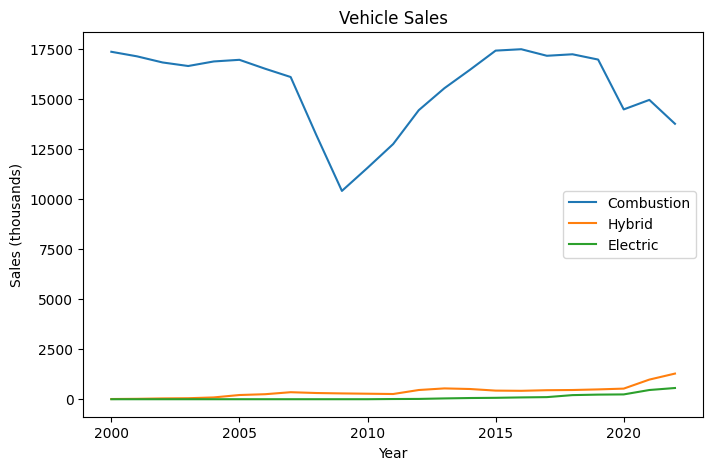

In [15]:
# what is the average change percentage for each year?
change = sales['Combustion'].diff() / sales['Combustion']
sales['del_Com'] = change.values
change = sales['Hybrid'].diff() / sales['Hybrid']
sales['del_Hybrid'] = change.values
change = sales['Electric'].diff() / sales['Electric']
sales['del_Elc'] = change.values

# plot sales data
plt.figure(figsize=(8, 5))
plt.plot(sales['Year'], sales['Combustion'], label='Combustion')
plt.plot(sales['Year'], sales['Hybrid'], label='Hybrid')
plt.plot(sales['Year'], sales['Electric'], label='Electric')
plt.xlabel('Year')
plt.ylabel('Sales (thousands)')
plt.title('Vehicle Sales')
plt.legend()
plt.show()

In [22]:
# what percent of cars were electric in 2011
s2011 = sales.loc[sales['Year'] == 2011]
e2011 = s2011['Electric'].values[0]
c2011 = s2011['Combustion'].values[0]
h2011 = s2011['Hybrid'].values[0]
t2011 = e2011 + c2011 + h2011

print('In 2011, ' + str(e2011) + ' electric cars were sold.')
print('In 2011, ' + str(c2011) + ' combustion cars were sold.')
print('In 2011, ' + str(h2011) + ' hybrid cars were sold.')
print('Electric cars made up ' + str(round(e2011 / t2011, 4)) + ' of sales.')
print('Combustion cars made up ' + str(round(c2011 / t2011, 4)) + ' of sales.')
print('Hybrid cars made up ' + str(round(h2011 / t2011, 4)) + ' of sales.')

s2021 = sales.loc[sales['Year'] == 2021]
e2021 = s2021['Electric'].values[0]
c2021 = s2021['Combustion'].values[0]
h2021 = s2021['Hybrid'].values[0]
t2021 = e2021 + c2021 + h2021

print('\n\nIn 2021, ' + str(e2021) + ' electric cars were sold.')
print('In 2021, ' + str(c2021) + ' combustion cars were sold.')
print('In 2021, ' + str(h2021) + ' hybrid cars were sold.')
print('Electric cars made up ' + str(round(e2021 / t2021, 4)) + ' of sales.')
print('Combustion cars made up ' + str(round(c2021 / t2021, 4)) + ' of sales.')
print('Hybrid cars made up ' + str(round(h2021 / t2021, 4)) + ' of sales.')

In 2011, 10 electric cars were sold.
In 2011, 12741.8 combustion cars were sold.
In 2011, 260 hybrid cars were sold.
Electric cars made up 0.0008 of sales.
Combustion cars made up 0.9792 of sales.
Hybrid cars made up 0.02 of sales.


In 2021, 460 electric cars were sold.
In 2021, 14946.9 combustion cars were sold.
In 2021, 980 hybrid cars were sold.
Electric cars made up 0.0281 of sales.
Combustion cars made up 0.9121 of sales.
Hybrid cars made up 0.0598 of sales.
